In [ ]:

 # prompt: generate a code to connect with google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# UPDATE THIS LINK EVERYTIME

#https://drive.google.com/file/d/1ijeCFt5RtcDeWKHaJunoVhHxo6Wra-nR/view?usp=sharing
#https://drive.google.com/file/d/1fGRUb0QpXkTKe0Zk5SxC06NSt1VqZY-V/view?usp=sharing


#REPLACE WITH YOUR OWN GOOGLE DRIVE DATASET LINK
#https://drive.google.com/file/d/1gIDQxHVAVAeqIvuWhXvU3r-LoLFz8ge5/view?usp=sharing

# REPLACE WITH YOUR OWN GOOGLE DIRVE DATASET LINK
# Import data from google drive
!gdown 13RIqYgphuZnKANIz-4OzhWqDEIVGqP3b

Downloading...
From (original): https://drive.google.com/uc?id=13RIqYgphuZnKANIz-4OzhWqDEIVGqP3b
From (redirected): https://drive.google.com/uc?id=13RIqYgphuZnKANIz-4OzhWqDEIVGqP3b&confirm=t&uuid=7419ea46-6141-440f-b4b8-218e7a2f662f
To: /content/HAM10000_all_in_one.zip
100% 2.77G/2.77G [00:55<00:00, 49.6MB/s]


In [ ]:
# Unzip it
import zipfile
#/content/tomato form plant village all in one.zip
#/content/tomato form plant village all in one

#PlantVillage_tomato_allinone.zip
zip_ref = zipfile.ZipFile("HAM10000_all_in_one.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16  # Import VGG16
#from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
#PlantVillage_tomato_allinone.zip
#Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration.zip
#data_dir = '/content/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration'
data_dir = '/content/HAM10000_all_in_one'

In [ ]:
import os
from PIL import Image


# Create a list of all the images in your dataset.
image_list = os.listdir(data_dir)

# Iterate over the list of images and load each image.
for image in image_list:
  try:
    image = Image.open(os.path.join(data_dir, image))
  except OSError:
    # Delete the image from the list.
    image_list.remove(image)

# Print the list of images that are not truncated.
print(image_list)

['Actinic_keratosis_or_intraepithelial_carcinoma', 'Melanocytic_nevi', 'Vascular_lesion']


In [ ]:

# Set hyperparameters
batch_size = 12
epochs = 1

# Data Augmentation with increased settings
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load the dataset and apply data augmentation with preprocessing
generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Define the number of samples in the dataset
num_samples = len(generator)

# Define the split sizes
train_size = int(0.8 * num_samples)
val_size = int(0.1 * num_samples)
test_size = num_samples - train_size - val_size

# Split the dataset into training, validation, and test sets
train_generator = generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation',  # Use 'validation' subset for validation data
)

Found 10015 images belonging to 7 classes.
Found 0 images belonging to 7 classes.


Found 8015 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.
Found 10015 images belonging to 7 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/30
668/668 [==============================] - 257s 358ms/step - loss: 1.5529 - accuracy: 0.6677 - val_loss: 1.1848 - val_accuracy: 0.6705
Epoch 2/30
668/668 [==============================] - 231s 346ms/step - loss: 1.1948 - accuracy: 0.6675 - val_loss: 1.1523 - val_accuracy: 0.6705
Epoch 3/30
668/668 [==============================] - 233s 349ms/step - loss: 1.1576 - accuracy: 0.6692 - val_loss: 1.1359 - val_accuracy: 0.6705
Epoch 4/30
668/668 [==============================] - 235s 352ms/step - loss: 1.1466 - accuracy: 0.6692 - val_loss: 1.1348 - val_accuracy: 0.6705
Epoch 5/30
668/668 [==============================] - 234s 350ms/step - loss: 1.1457 - accuracy: 0.6692 - val_loss: 1.1489 - val_accuracy: 0.6705
Epoch 6/30
668/668 [==============================] - 230s 344ms/step - loss: 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                precision    recall  f1-score   support

Actinic_keratosis_or_intraepithelial_carcinoma       0.00      0.00      0.00       327
                          Basal_cell_carcinoma       0.00      0.00      0.00       514
                  Benign_keratosis_like_lesion       0.00      0.00      0.00      1099
                                Dermatofibroma       0.00      0.00      0.00       115
                              Melanocytic_nevi       0.67      1.00      0.80      6705
                                      Melanoma       0.00      0.00      0.00      1113
                               Vascular_lesion       0.00      0.00      0.00       142

                                      accuracy                           0.67     10015
                                     macro avg       0.10      0.14      0.11     10015
                                  weighted avg       0.45      0.67      0.54     10015



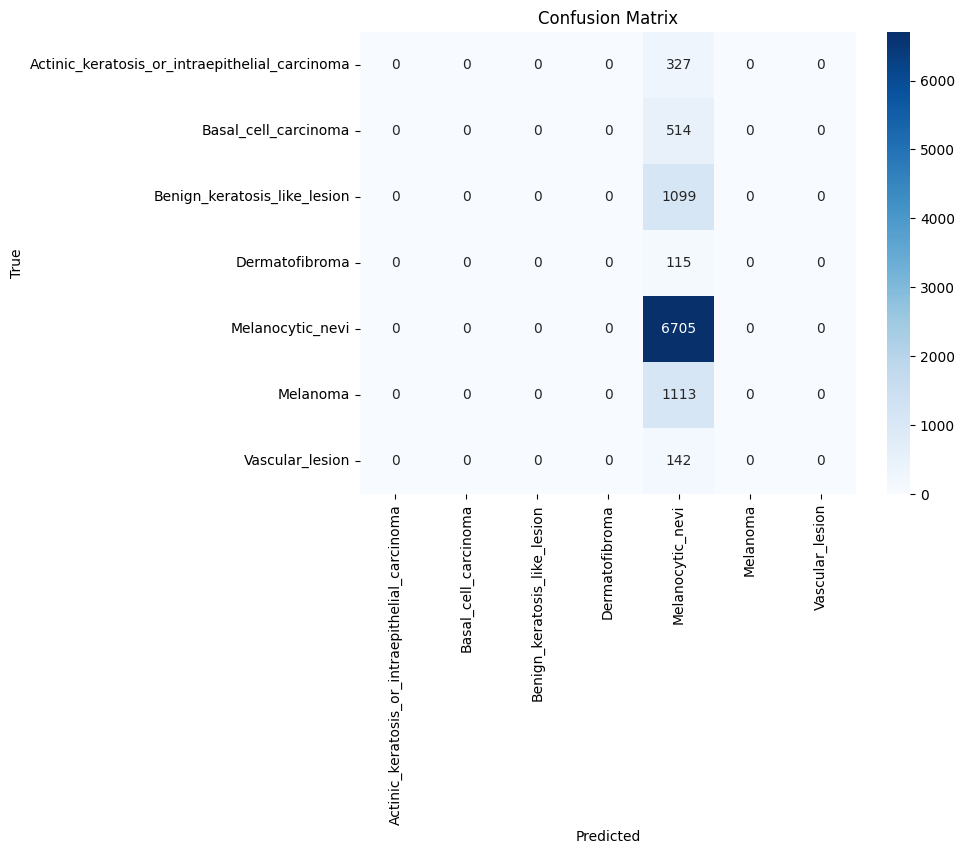

In [ ]:
#edge
# Set hyperparameters
batch_size = 12
epochs = 30

# Data Augmentation with increased settings
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # reserve 20% of images for validation
)

# Load the dataset and apply data augmentation with preprocessing
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # Use 'training' subset for training data
)

# Define the number of samples in the dataset
num_samples = len(train_generator)

#train-validation-test split.
#80% training, 10% validation and 10% tesing
# Define the split sizes
train_size = int(0.8 * num_samples)
val_size = int(0.1 * num_samples)
test_size = num_samples - train_size - val_size

# Split the dataset into training, validation, and test sets
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation',  # Use 'validation' subset for validation data
)


# Create a separate generator for the test set without data augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,  # No shuffling for the test data
)

# Build the base model (VGG-16) and add custom layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[:100]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.3)(x)
predictions = Dense(generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Implement a learning rate schedule
learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)


# Compile the model with the learning rate schedule
model.compile(optimizer=Adam(learning_rate=learning_rate_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with fine-tuning
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Convert one-hot encoded labels back to class indices
y_true = test_generator.classes

# Convert model predictions to class indices
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Generate the classification report
class_names = list(train_generator.class_indices.keys())  # Get class labels
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the classification report
print(report)

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Create a function to plot the confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Call the function to plot the confusion matrix
plot_confusion_matrix(confusion, class_names)

# # Compile the model with the learning rate schedule
# model.compile(optimizer=Adam(learning_rate=learning_rate_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

# # Implement early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with fine-tuning
# history = model.fit(
#     train_generator,
#     epochs=epochs,
#     validation_data=validation_generator,
#     callbacks=[early_stopping]
# )

# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
# print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# # Convert one-hot encoded labels back to class indices
# y_true = test_generator.classes

# # Convert model predictions to class indices
# y_pred = np.argmax(model.predict(test_generator), axis=1)

# # Generate the classification report
# class_names = list(train_generator.class_indices.keys())  # Get class labels
# report = classification_report(y_true, y_pred, target_names=class_names)

# # Print the classification report
# print(report)

# # Calculate the confusion matrix
# confusion = confusion_matrix(y_true, y_pred)

# # Create a function to plot the confusion matrix
# def plot_confusion_matrix(cm, labels):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Confusion Matrix')
#     plt.show()

# # Call the function to plot the confusion matrix
# plot_confusion_matrix(confusion, class_names)















In [ ]:
# import pandas as pd

# # Create a dictionary to store the results
# results_dict = {
#     'Test Accuracy': [test_accuracy * 100],
#     'Classification Report': [report],
# }

# # Convert the confusion matrix to a DataFrame
# confusion_df = pd.DataFrame(confusion, index=class_names, columns=class_names)

# # Save the confusion matrix to CSV
# confusion_df.to_csv('confusion_matrix.csv')

# # Convert the dictionary to a DataFrame
# results_df = pd.DataFrame(results_dict)

# # Save the results to CSV
# results_df.to_csv('evaluation_results.csv', index=False)


import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the directory where you want to save the files
path = '/content/drive/My Drive/'

# Create a dictionary to store the results
results_dict = {
    'Test Accuracy': [test_accuracy * 100],
    'Classification Report': [report],
}

# Convert the confusion matrix to a DataFrame
confusion_df = pd.DataFrame(confusion, index=class_names, columns=class_names)

# Save the confusion matrix to CSV
confusion_df.to_csv(path + 'VGG16_cse438_HUM_All_in_one_dataset_confusion_matrix.csv')

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)

# Save the results to CSV
results_df.to_csv(path + 'VGG16_cse438_HUM_All_in_one_dataset_evaluation_results.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
